In [8]:
#importing functions 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from skimage.util.montage import montage2d
import tflearn
from PIL import Image
%matplotlib inline

In [9]:
#importing data
from tensorflow.examples.tutorials.mnist import input_data
#one hot encoding returns an array of zeros and a single one. One corresponds to the class
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [10]:
data


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f46be01a860>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f46b964f438>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f46b964f588>)

In [16]:
print ("Shape of images in training dataset {}".format(data.train.images.shape))
print ("Shape of classes in training dataset {}".format(data.train.labels.shape))
print ("Shape of images in testing dataset {}".format(data.test.images.shape))
print ("Shape of classes in testing dataset {}".format(data.test.labels.shape))
print ("Shape of images in validation dataset {}".format(data.validation.images.shape))
print ("Shape of classes in validation dataset {}".format(data.validation.labels.shape))

Shape of images in training dataset (55000, 784)
Shape of classes in training dataset (55000, 10)
Shape of images in testing dataset (10000, 784)
Shape of classes in testing dataset (10000, 10)
Shape of images in validation dataset (5000, 784)
Shape of classes in validation dataset (5000, 10)


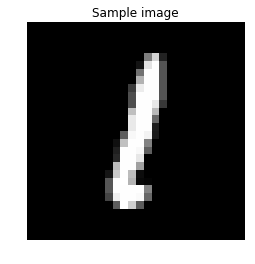

In [15]:
#sample image
sample=data.train.images[6].reshape(28,28) 
plt.imshow(sample ,cmap='gray')
plt.title('Sample image')
plt.axis('off')
plt.show()

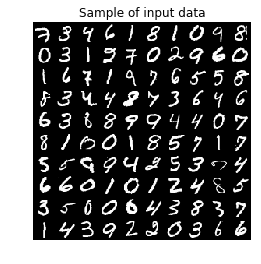

In [19]:
# function to display montage of input data 
imgs=data.train.images[0:100]
montage_img=np.zeros([100,28,28])
for i in range(len(imgs)) : 
        montage_img[i]=imgs[i].reshape(28,28) 
plt.imshow(montage2d(montage_img), cmap='gray')
plt.title('Sample of input data')
plt.axis('off')
plt.show()

In [20]:
images=data.train.images
images=np.reshape(images,[images.shape[0],28,28]) #
mean_img = np.mean(images, axis=0)
std_img = np.std(images, axis=0)


In [24]:
images.shape[0],28,28

(55000, 28, 28)

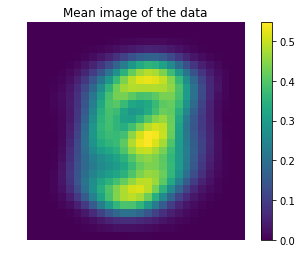

In [25]:
plt.imshow(mean_img)
plt.title('Mean image of the data')
plt.colorbar()
plt.axis('off')
plt.show()

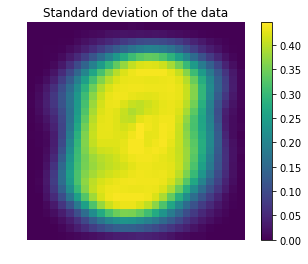

In [26]:
plt.imshow(std_img)
plt.colorbar()
plt.title('Standard deviation of the data')
plt.axis('off')
plt.show()


In [27]:
#input - shape 'None' states that, the value can be anything, i.e we can feed in any number of images
#input image
x=tf.placeholder(tf.float32,shape=[None,784]) 
#input class
y_=tf.placeholder(tf.float32,shape=[None, 10])


In [28]:
#Input Layer

#reshaping input for convolutional operation in tensorflow
# '-1' states that there is no fixed batch dimension, 28x28(=784) is reshaped from 784 pixels and '1' for a single
#channel, i.e a gray scale image
x_input=tf.reshape(x,[-1,28,28,1], name='input')
#first convolutional layer with 32 output filters, filter size 5x5, stride of 2,same padding, and RELU activation.
#please note, I am not adding bias, but one could add bias.Optionally you can add max pooling layer as well 
conv_layer1=tflearn.layers.conv.conv_2d(x_input, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')


In [29]:
#2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


#second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)

#fully connected layer
fcl= tflearn.layers.core.fully_connected(out_layer2, 1024, activation='relu')
fcl_dropout = tflearn.layers.core.dropout(fcl, 0.8)
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout, 10, activation='softmax', name='output')

In [30]:
print ("Shape of input : {}".format(x_input.get_shape().as_list()))
print ("Shape of first convolutional layer : {}".format(out_layer1.get_shape().as_list()))
print ("Shape of second convolutional layer : {}".format(out_layer2.get_shape().as_list()))
print ("Shape of fully connected layer : {}".format(fcl.get_shape().as_list()))
print ("Shape of output layer : {}".format(y_predicted.get_shape().as_list()))

Shape of input : [None, 28, 28, 1]
Shape of first convolutional layer : [None, 14, 14, 32]
Shape of second convolutional layer : [None, 7, 7, 32]
Shape of fully connected layer : [None, 1024]
Shape of output layer : [None, 10]


In [31]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted), reduction_indices=[1]))
#optimiser -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
#session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [33]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

['is_training/Initializer/Const',
 'is_training',
 'is_training/Assign',
 'is_training/read',
 'Assign/value',
 'Assign',
 'Assign_1/value',
 'Assign_1',
 'Placeholder',
 'Placeholder_1',
 'input/shape',
 'input',
 'conv_layer_1/W/Initializer/random_uniform/shape',
 'conv_layer_1/W/Initializer/random_uniform/min',
 'conv_layer_1/W/Initializer/random_uniform/max',
 'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 'conv_layer_1/W/Initializer/random_uniform/sub',
 'conv_layer_1/W/Initializer/random_uniform/mul',
 'conv_layer_1/W/Initializer/random_uniform',
 'conv_layer_1/W',
 'conv_layer_1/W/Assign',
 'conv_layer_1/W/read',
 'conv_layer_1/W/Regularizer/L2Loss',
 'conv_layer_1/W/Regularizer/L2-Loss/y',
 'conv_layer_1/W/Regularizer/L2-Loss',
 'conv_layer_1/b/Initializer/Const',
 'conv_layer_1/b',
 'conv_layer_1/b/Assign',
 'conv_layer_1/b/read',
 'conv_layer_1/Conv2D',
 'conv_layer_1/BiasAdd',
 'conv_layer_1/Relu',
 'MaxPool2D/MaxPool',
 'conv_layer_2/W/Initializer/random_unifor

In [34]:
#number of interations
epoch=15000
batch_size=50

In [ ]:
for i in range(epoch):
    #batch wise training 
    x_batch, y_batch = data.train.next_batch(batch_size)
    _,loss=sess.run([train_step, cross_entropy], feed_dict={x: x_batch,y_: y_batch})
    #_, loss,acc=sess.run([train_step,cross_entropy,accuracy], feed_dict={x:input_image , y_: input_class})
    
    if i%500==0:    
        Accuracy=sess.run(accuracy,
                           feed_dict={
                        x: data.test.images,
                        y_: data.test.labels
                      })
        Accuracy=round(Accuracy*100,2)
        print ("Loss : {} , Accuracy on test set : {} %" .format(loss, Accuracy))
    elif i%100==0:
        print ("Loss : {}" .format(loss))


Loss : 2.2912018299102783 , Accuracy on test set : 14.69 %
Loss : 0.3532309830188751
Loss : 0.2739028036594391
Loss : 0.2064903825521469
Loss : 0.12244722992181778
Loss : 0.16957515478134155 , Accuracy on test set : 95.22 %
Loss : 0.12836448848247528
Loss : 0.08073476701974869
Loss : 0.12100706249475479
Loss : 0.19831246137619019
Loss : 0.07864730060100555 , Accuracy on test set : 97.32 %
Loss : 0.060791026800870895
Loss : 0.08993411064147949
Loss : 0.11643896996974945
Loss : 0.060946736484766006
Loss : 0.09191159904003143 , Accuracy on test set : 97.88 %
Loss : 0.019446982070803642
Loss : 0.15513747930526733
Loss : 0.07415588945150375
Loss : 0.03374222293496132
Loss : 0.01656208373606205 , Accuracy on test set : 97.99 %
Loss : 0.05113162472844124
Loss : 0.022192291915416718
Loss : 0.04500038921833038
Loss : 0.04312818497419357
Loss : 0.06209666281938553 , Accuracy on test set : 98.57 %
Loss : 0.09621495008468628
Loss : 0.02970316633582115
Loss : 0.055773064494132996
Loss : 0.020537717